# Compare different projections

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_fig = '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/KNMI21/projections/figures/'

In [5]:
data_dir = ['../outputs/' , '../outputs/'] #'../outputs/ref_proj/'
#namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
namelists = ['AR5_glo_decomp', 'RECEIPT_D73']
sce = ['rcp85', 'ssp585'] 

proj_ds_list = []
for i in range(len(namelists)):
    proj_ds_list.append(xr.open_dataset(f'{data_dir[i]}SeaLevelPerc_{namelists[i]}_{sce[i]}.nc'))

### Compare the percentiles in 2100

In [6]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 46.396197,  53.749652,  57.919541,  61.885896,  63.249917,  74.094733,
        85.75137 ,  87.397571,  92.276002,  97.988612, 109.988753])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [7]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        if proj in tot_df.columns:
            tot_df[f'{proj}_{idx}'] = df['perc_ts']
        else:
            tot_df[proj] = df['perc_ts']
tot_df

,AR5_glo_decomp,RECEIPT_D73
percentiles,,
1,46.396197,39.745423
5,53.749652,51.419662
10,57.919541,57.789297
17,61.885896,63.834841
20,63.249917,65.970256
50,74.094733,83.970956
80,85.751370,107.683329
83,87.397571,111.574633
90,92.276002,124.084949


### Compare the time series of individual contributors

In [10]:
nb_proc = len(proj_ds_list[0].proc)
perc = 95

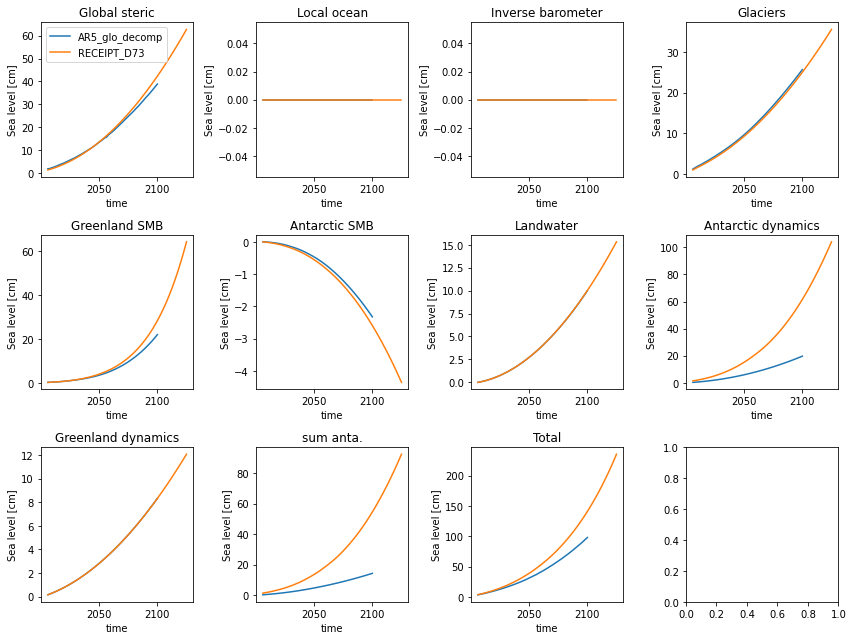

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()

#plt.savefig(f'{path_fig}comp_proj_{sce[0]}_{sce[1]}.pdf', dpi=150)